<a href="https://colab.research.google.com/github/Navegantes-UNIVESP/PI4_SIM/blob/main/An%C3%A1lise_de_Dados_Question%C3%A1rio_sobre_Estilo_de_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plot-likert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plot_likert
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
url = 'https://github.com/Navegantes-UNIVESP/PI4_SIM/blob/main/dados_questionario_estilo_de_vida/dados_questionario_estilo_de_vida.xlsx?raw=true'
excel_data = pd.read_excel(url)
data = pd.DataFrame(excel_data)
data.rename(columns = {'Na sua opinião, por que você leva uma vida saudável/não saudável?':'saudavel_naosaudavel'}, inplace = True)
data.head(5)

,ID,Email,termos,data,exercicio,sono,celular_dormir,agua,alimentacao,caloricos_freq,frutas_verduras,alcool,bebida_doce,fumante,saudavel_naosaudavel,quest_longevidade
0,1,2004600@aluno.univesp.br,"Não, eu não concordo com os termos.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,anonymous,"Sim, eu concordo em participar.",1978.0,Concordo Em parte,NaN,Frequentemente,Concordo Em parte,Concordo Em parte,Concordo Em parte,Concordo Em parte,Raramente (mensalmente),2 ou 4 vezes por semana,Não,Atendente,NaN
2,3,anonymous,"Sim, eu concordo em participar.",1965.0,Concordo Em parte,Entre 6 e 8 horas,Quase sempre,Concordo Totalmente,Concordo Totalmente,Discordo Em parte,Concordo Totalmente,Nunca,Raramente (mensalmente),Não,Meia saudável. Deveria né dedicar mais as ativ...,Sim
3,4,anonymous,"Sim, eu concordo em participar.",1998.0,Discordo Totalmente,Menos de 6 horas,Quase sempre,Concordo Totalmente,Não concordo nem discordo,Concordo Em parte,Concordo Totalmente,Nunca,1 vez por semana ou menos,Não,Levo uma vida saudavél para viver com mais qua...,Sim
4,5,anonymous,"Sim, eu concordo em participar.",1999.0,Discordo Totalmente,Entre 8 e 10 horas,Frequentemente,Discordo Em parte,Discordo Em parte,Concordo Em parte,Não concordo nem discordo,Raramente (mensalmente),2 ou 4 vezes por semana,Sim,Sem tempo para uma vida saudável,Talvez


In [ ]:
# 1. Termos

data.termos.value_counts()

Sim, eu concordo em participar.        87
Não, eu não concordo com os termos.     2
Name: termos, dtype: int64

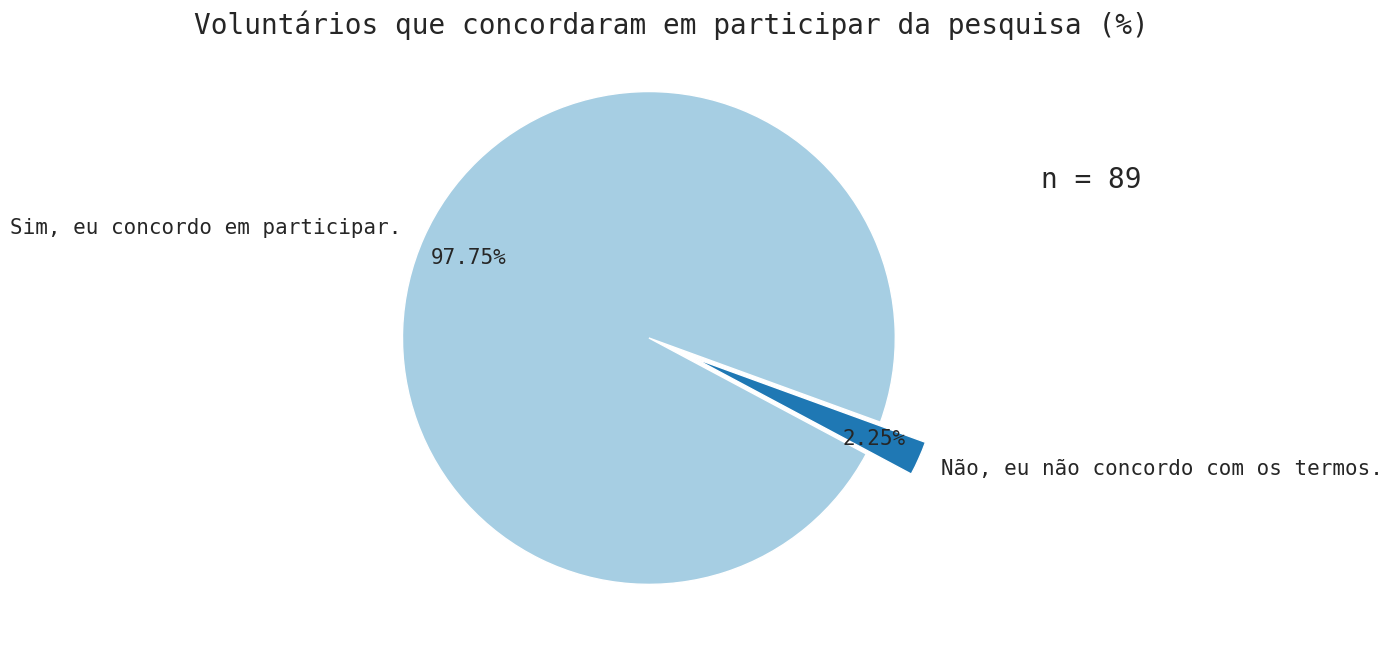

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.2)

plt.pie(x=data.termos.value_counts(), labels=data.termos.value_counts().index,
    autopct='%1.2f%%',
    textprops={'fontsize':15, 'fontname':'monospace'},
    colors=sns.color_palette('Paired'),
    startangle=340,
    pctdistance=0.80,
    # Add space around each slice
    explode=[0.1, 0.1]
)
 
plt.title(
    label="Voluntários que concordaram em participar da pesquisa (%)",
    fontdict={"fontsize":20, 'fontname':'monospace'},
    pad=5
)

plt.text(1.5, 0.65, r'n = 89', fontdict={"fontsize":20, 'fontname':'monospace'})

plt.show()

In [ ]:
# 2. Idade
data['idade'] =  2023 - data['data']
data.head()

,ID,Email,termos,data,exercicio,sono,celular_dormir,agua,alimentacao,caloricos_freq,frutas_verduras,alcool,bebida_doce,fumante,saudavel_naosaudavel,quest_longevidade,idade
0,1,2004600@aluno.univesp.br,"Não, eu não concordo com os termos.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,anonymous,"Sim, eu concordo em participar.",1978.0,Concordo Em parte,NaN,Frequentemente,Concordo Em parte,Concordo Em parte,Concordo Em parte,Concordo Em parte,Raramente (mensalmente),2 ou 4 vezes por semana,Não,Atendente,NaN,45.0
2,3,anonymous,"Sim, eu concordo em participar.",1965.0,Concordo Em parte,Entre 6 e 8 horas,Quase sempre,Concordo Totalmente,Concordo Totalmente,Discordo Em parte,Concordo Totalmente,Nunca,Raramente (mensalmente),Não,Meia saudável. Deveria né dedicar mais as ativ...,Sim,58.0
3,4,anonymous,"Sim, eu concordo em participar.",1998.0,Discordo Totalmente,Menos de 6 horas,Quase sempre,Concordo Totalmente,Não concordo nem discordo,Concordo Em parte,Concordo Totalmente,Nunca,1 vez por semana ou menos,Não,Levo uma vida saudavél para viver com mais qua...,Sim,25.0
4,5,anonymous,"Sim, eu concordo em participar.",1999.0,Discordo Totalmente,Entre 8 e 10 horas,Frequentemente,Discordo Em parte,Discordo Em parte,Concordo Em parte,Não concordo nem discordo,Raramente (mensalmente),2 ou 4 vezes por semana,Sim,Sem tempo para uma vida saudável,Talvez,24.0


In [ ]:
data.idade.count()

86

Text(55, 20, 'n = 86')

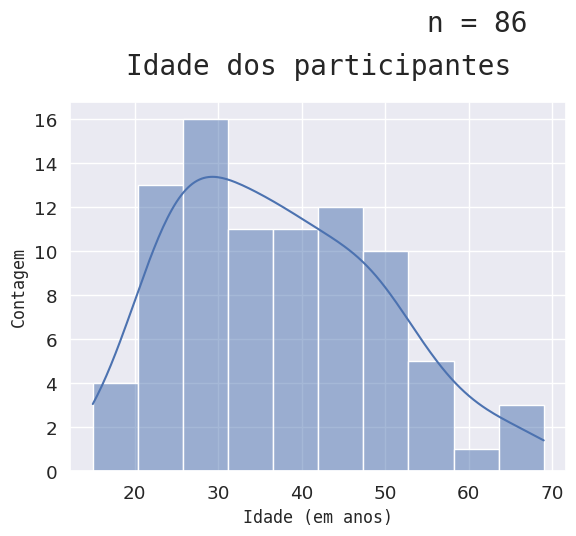

In [ ]:
sns.histplot(data=data, x="idade", kde=True, bins = 10)
plt.title(
    label="Idade dos participantes",
    fontdict={"fontsize":20, 'fontname':'monospace'},
    pad=20
)

plt.xlabel('Idade (em anos)', fontdict={"fontsize":12, 'fontname':'monospace'})
plt.ylabel('Contagem', fontdict={"fontsize":12, 'fontname':'monospace'})
plt.text(55, 20, r'n = 86', fontdict={"fontsize":20, 'fontname':'monospace'})


In [ ]:
# Likert Scale Questions 

data.head(5)

data_likert1 = data[['exercicio', 'agua', 'alimentacao', 'caloricos_freq','frutas_verduras']]
data_likert2 = data[['alcool', 'bebida_doce']]
data_likert3 = data['celular_dormir']

/usr/local/lib/python3.9/dist-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


[Text(0, 0, '9) Você costuma adicionar na sua alimentação \n diária frutas e verduras'),
 Text(0, 1, '8) Você costuma se alimentar com alimentos \n muito calóricos ou gordurosos'),
 Text(0, 2, '7) Você considera sua alimentação saudável'),
 Text(0, 3, '6) Você toma água regularmente'),
 Text(0, 4, '3) Você pratica exercícios físicos regularmente')]

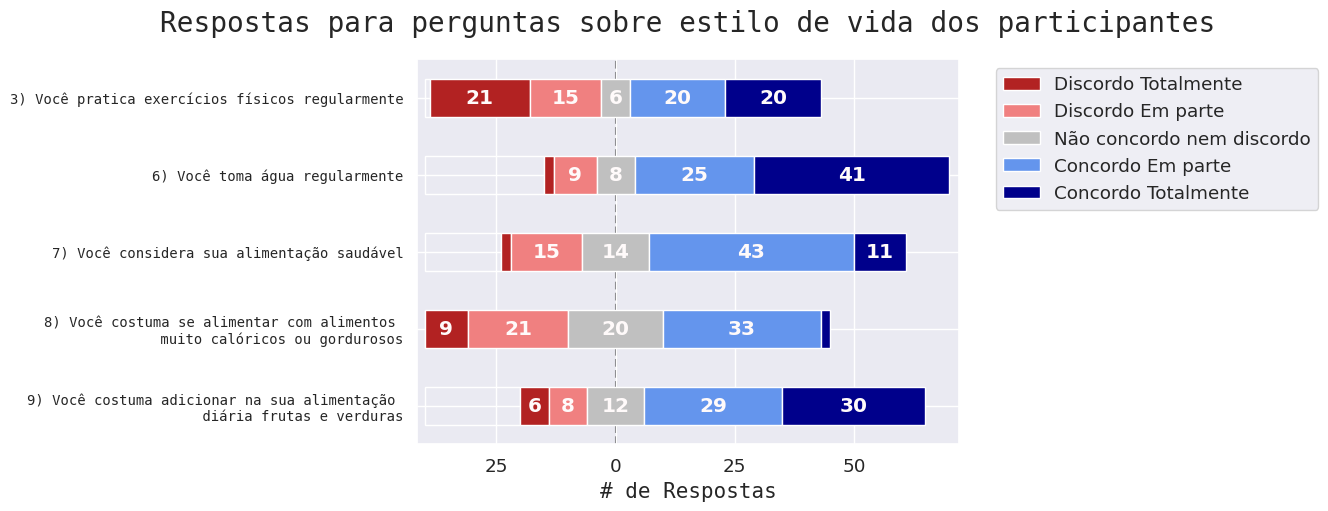

In [ ]:

escala1 = ["Discordo Totalmente", 
           "Discordo Em parte",
           "Não concordo nem discordo",
           "Concordo Em parte",
           "Concordo Totalmente"
]

ax = plot_likert.plot_likert(data_likert1, escala1,
                        figsize=(7,5),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)

ax.set_title(
    label="Respostas para perguntas sobre estilo de vida dos participantes",
    fontdict={"fontsize":20, 'fontname':'monospace'},
    pad=20
)
ax.xaxis.set_label_text('# de Respostas', fontdict={"fontsize":15, 'fontname':'monospace'})
ax.set_yticklabels(['9) Você costuma adicionar na sua alimentação \n diária frutas e verduras', 
                    '8) Você costuma se alimentar com alimentos \n muito calóricos ou gordurosos',
                    '7) Você considera sua alimentação saudável',
                    '6) Você toma água regularmente', 
                    '3) Você pratica exercícios físicos regularmente'], 
                   fontdict={"fontsize":10, 'fontname':'monospace'})


/usr/local/lib/python3.9/dist-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


[Text(0, 0, '10) Com que frequência você costuma ingerir \n bebidas adocicadas (por exemplo: Refrigerantes)?'),
 Text(0, 1, '11) Com que frequência você costuma ingerir \n  bebidas alcóolicas?')]

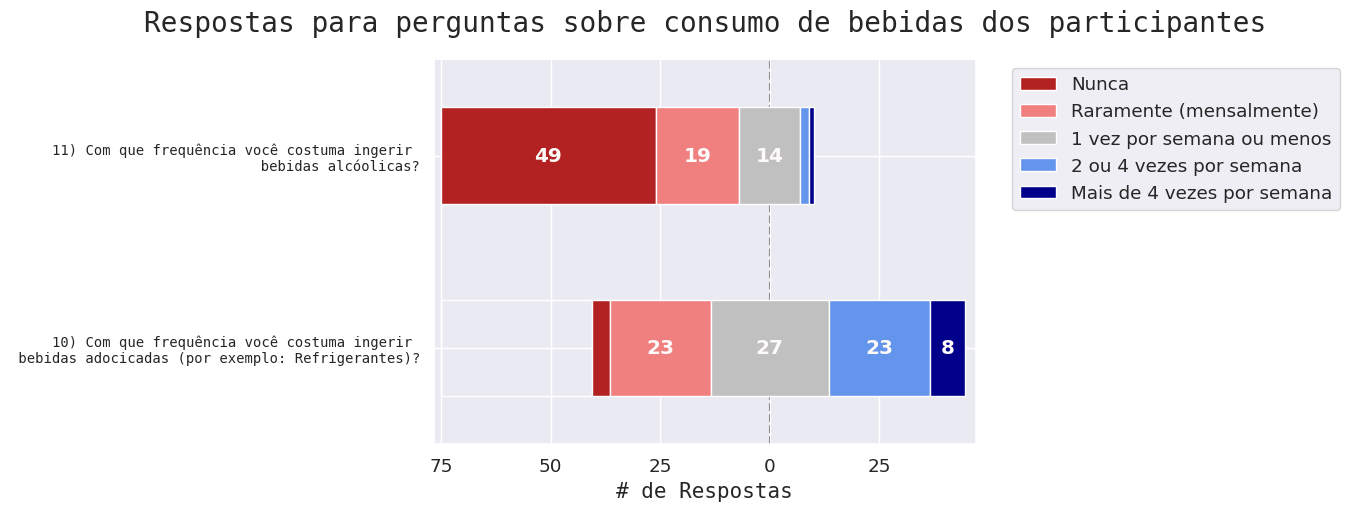

In [ ]:
escala2 = ["Nunca", 
           "Raramente (mensalmente)",
           "1 vez por semana ou menos",
           "2 ou 4 vezes por semana",
           "Mais de 4 vezes por semana"
]

ax2 = plot_likert.plot_likert(data_likert2, escala2,
                        figsize=(7,5),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)

ax2.set_title(
    label="Respostas para perguntas sobre consumo de bebidas dos participantes",
    fontdict={"fontsize":20, 'fontname':'monospace'},
    pad=20
)
ax2.xaxis.set_label_text('# de Respostas', fontdict={"fontsize":15, 'fontname':'monospace'})
ax2.set_yticklabels(['10) Com que frequência você costuma ingerir \n bebidas adocicadas (por exemplo: Refrigerantes)?',
                    '11) Com que frequência você costuma ingerir \n  bebidas alcóolicas?'], 
                   fontdict={"fontsize":10, 'fontname':'monospace'})

/usr/local/lib/python3.9/dist-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


[Text(0, 0, '5) Com que frequência você usa o \n celular até 1 hora antes de dormir?')]

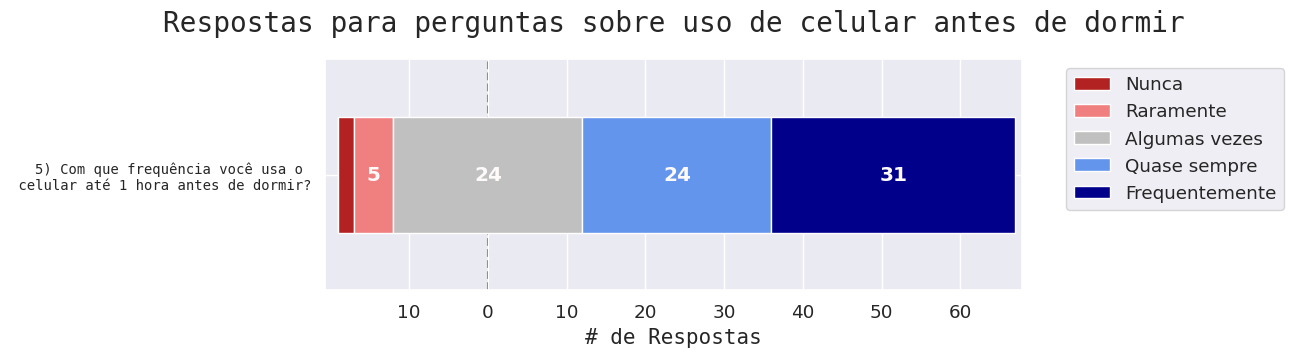

In [ ]:
escala3 = ["Nunca", 
           "Raramente",
           "Algumas vezes",
           "Quase sempre",
           "Frequentemente"
]

ax3 = plot_likert.plot_likert(data_likert3, escala3,
                        figsize=(9,3),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)

ax3.set_title(
    label="Respostas para perguntas sobre uso de celular antes de dormir",
    fontdict={"fontsize":20, 'fontname':'monospace'},
    pad=20
)
ax3.xaxis.set_label_text('# de Respostas', fontdict={"fontsize":15, 'fontname':'monospace'})
ax3.set_yticklabels(['5) Com que frequência você usa o \n celular até 1 hora antes de dormir?'], 
                   fontdict={"fontsize":10, 'fontname':'monospace'})


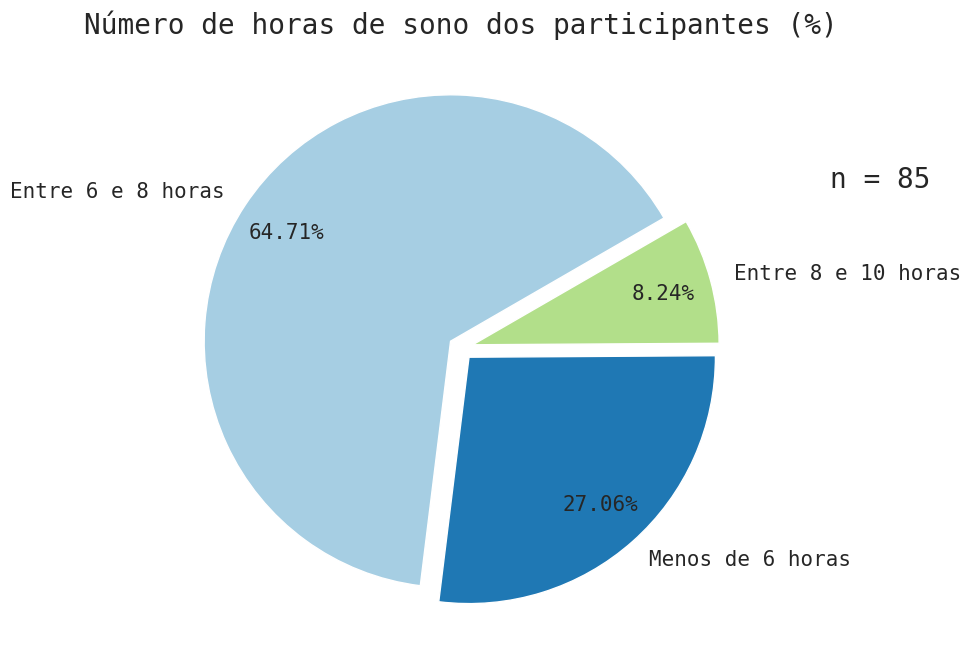

In [ ]:
# 4. Quantas horas você dorme por noite?


plt.figure(figsize=(8,8))
sns.set(font_scale = 1.2)

plt.pie(x=data.sono.value_counts(), labels=data.sono.value_counts().index,
    autopct='%1.2f%%',
    textprops={'fontsize':15, 'fontname':'monospace'},
    colors=sns.color_palette('Paired'),
    startangle=30,
    pctdistance=0.80,
    # Add space around each slice
    explode=[0.05, 0.05, 0.05]
)
 
plt.title(
    label="Número de horas de sono dos participantes (%)",
    fontdict={"fontsize":20, 'fontname':'monospace'},
    pad=5
)

plt.text(1.5, 0.65, r'n = 85', fontdict={"fontsize":20, 'fontname':'monospace'})

plt.show()

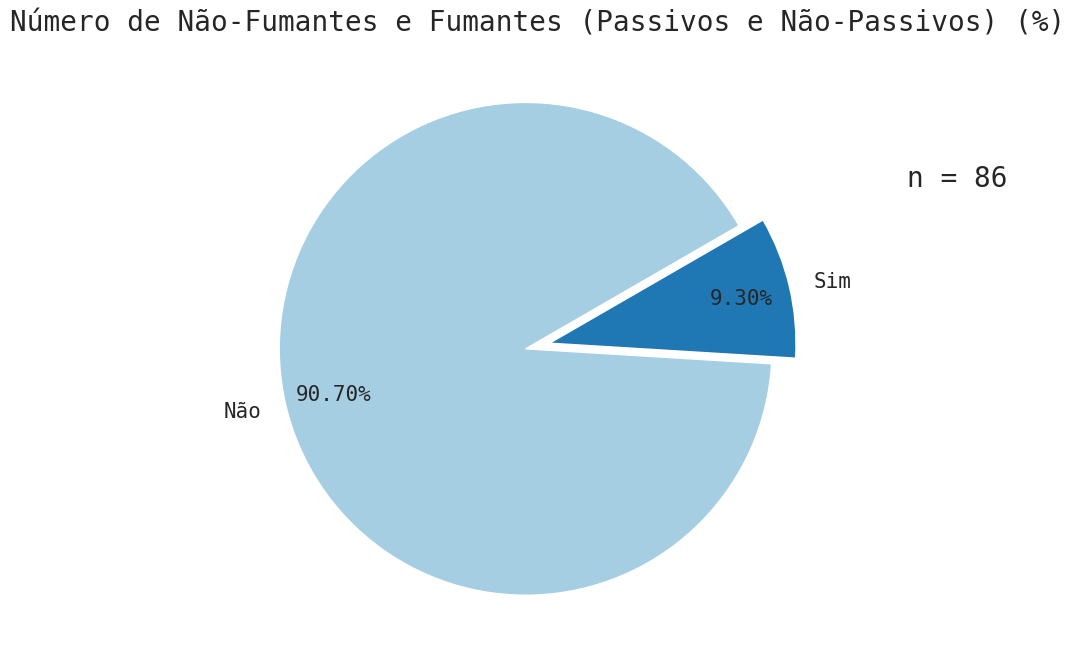

In [ ]:
# 12. Você fuma (ou convive com alguém que fuma)?


plt.figure(figsize=(8,8))
sns.set(font_scale = 1.2)

plt.pie(x=data.fumante.value_counts(), labels=data.fumante.value_counts().index,
    autopct='%1.2f%%',
    textprops={'fontsize':15, 'fontname':'monospace'},
    colors=sns.color_palette("Paired"),
    startangle=30,
    pctdistance=0.80,
    # Add space around each slice
    explode=[0.05, 0.05]
)
 
plt.title(
    label="Número de Não-Fumantes e Fumantes (Passivos e Não-Passivos) (%)",
    fontdict={"fontsize":20, 'fontname':'monospace'},
    pad=5
)

plt.text(1.5, 0.65, r'n = 86', fontdict={"fontsize":20, 'fontname':'monospace'})

plt.show()

In [ ]:
# 13. Na sua opinião, por que você leva uma vida saudável/não saudável?

summary = data.dropna(subset=['saudavel_naosaudavel'], axis=0)['saudavel_naosaudavel']

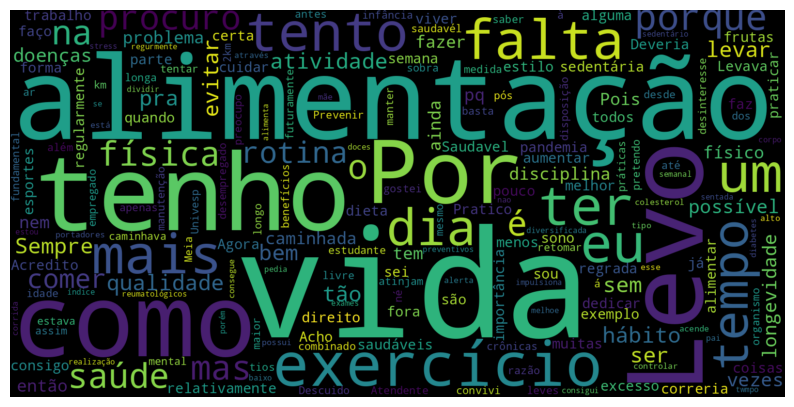

In [ ]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "uma", "minha", "que", "meu", "em", "você", "de", "ao", "os", "saudável", "e","não","para"])
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

In [ ]:
# 14. Ao conhecer sua longevidade (expectativa de vida), considerando seu estilo de vida atual, você estaria mais inclinado a levar uma vida saudável?

data.quest_longevidade.value_counts()

Sim       60
Talvez    22
Não        4
Name: quest_longevidade, dtype: int64

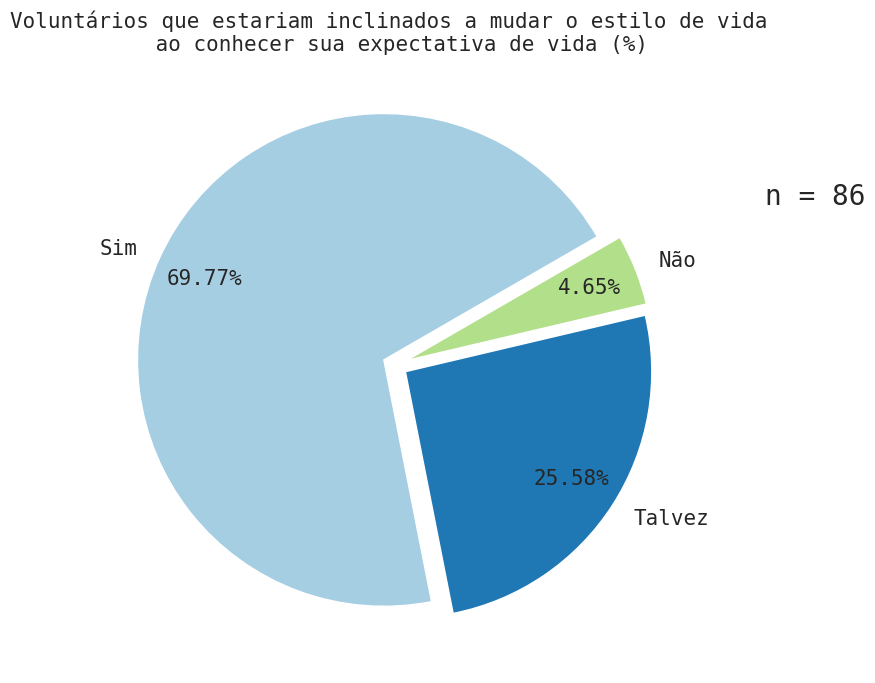

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.2)

plt.pie(x=data.quest_longevidade.value_counts(), labels=data.quest_longevidade.value_counts().index,
    autopct='%1.2f%%',
    textprops={'fontsize':15, 'fontname':'monospace'},
    colors=sns.color_palette('Paired'),
    startangle=30,
    pctdistance=0.80,
    # Add space around each slice
    explode=[0.05, 0.05, 0.05]
)
 
plt.title(
    label="Voluntários que estariam inclinados a mudar o estilo de vida \n ao conhecer sua expectativa de vida (%)",
    fontdict={"fontsize":15, 'fontname':'monospace'},
    pad=5
)

plt.text(1.5, 0.65, r'n = 86', fontdict={"fontsize":20, 'fontname':'monospace'})

plt.show()